# Expressibility and engtangling capability

In [1]:
import os
#os.environ["OMP_NUM_THREADS"] = "8"
import warnings
import json
import sys
import glob
import numpy
import pickle
import random
import collections
import pennylane as qml
import matplotlib.pyplot as plt
import torch
import numpy as np

from discopy.quantum.pennylane import to_pennylane, PennyLaneCircuit
from scipy.special import kl_div
from math import ceil
from pathlib import Path
from sympy import default_sort_key
from utils import transform_into_pennylane_circuits, read_diagrams, get_symbols, flatten

this_folder = os.path.abspath(os.getcwd())
nshot = 1000
fidelity=[]

In [2]:
num_of_bins = 75
bins_list = [i/(num_of_bins) for i in range(num_of_bins + 1)]
bins_x = [bins_list[1]+bins_list[i] for i in range(num_of_bins - 1)]

def P_harr(l, u, N):
    return (1-l)**(N-1)-(1-u)**(N-1)

#Harr histogram
P_harr_hist = [P_harr(bins_list[i], bins_list[i+1], 2) for i in range(num_of_bins)]

In [3]:
workload = "execution_time"
#workload = "cardinality"

workload_size = "main"

classification = 1
layers = 1
single_qubit_params = 3
n_wire_count = 1

# Access the selected circuits
path_name = this_folder + "//simplified-JOB-diagrams//"\
            + workload + "//" + workload_size + "//circuits//"\
            + str(classification) + "//" + str(layers) + "_layer//"\
           + str(single_qubit_params) + "_single_qubit_params//" + str(n_wire_count)\
            + "_n_wire_count//"

In [4]:
training_circuits_paths = glob.glob(path_name + "training//[0-9]*.p")
validation_circuits_paths = glob.glob(path_name + "validation//[0-9]*.p")
test_circuits_paths = glob.glob(path_name + "test//[0-9]*.p")

In [5]:
training_circuits = read_diagrams(training_circuits_paths)
validation_circuits = read_diagrams(validation_circuits_paths)
test_circuits = read_diagrams(test_circuits_paths)

## Expressibility

In [6]:
circuits = training_circuits

for x in range(100):
    print("Progress:", x)
    for c in circuits:
        disco_circuit = circuits[c]
        qml_circuit = to_pennylane(disco_circuit, probabilities = True)
        current_symbols = disco_circuit.free_symbols
        current_symbols = list(sorted(current_symbols, key=default_sort_key))
        params = torch.Tensor([[2*np.pi*random.uniform(0, 1)] for i in range(len(current_symbols))]) 
        result = qml_circuit.eval(symbols=current_symbols, weights=params)
        fidelity.append(result[0])

Progress: 0
Progress: 1
Progress: 2
Progress: 3
Progress: 4
Progress: 5
Progress: 6
Progress: 7
Progress: 8
Progress: 9
Progress: 10
Progress: 11
Progress: 12
Progress: 13
Progress: 14
Progress: 15
Progress: 16
Progress: 17
Progress: 18
Progress: 19
Progress: 20
Progress: 21
Progress: 22
Progress: 23
Progress: 24
Progress: 25
Progress: 26
Progress: 27
Progress: 28
Progress: 29
Progress: 30
Progress: 31
Progress: 32
Progress: 33
Progress: 34
Progress: 35
Progress: 36
Progress: 37
Progress: 38
Progress: 39
Progress: 40
Progress: 41
Progress: 42
Progress: 43
Progress: 44
Progress: 45
Progress: 46
Progress: 47
Progress: 48
Progress: 49
Progress: 50
Progress: 51
Progress: 52
Progress: 53
Progress: 54
Progress: 55
Progress: 56
Progress: 57
Progress: 58
Progress: 59
Progress: 60
Progress: 61
Progress: 62
Progress: 63
Progress: 64
Progress: 65
Progress: 66
Progress: 67
Progress: 68
Progress: 69
Progress: 70
Progress: 71
Progress: 72
Progress: 73
Progress: 74
Progress: 75
Progress: 76
Progress:

In [10]:
print(fidelity[2])

tensor(0.0004, dtype=torch.float64)


In [ ]:
fidelity = [int(t) for t in fidelity]

ValueError: weights should have the same shape as x

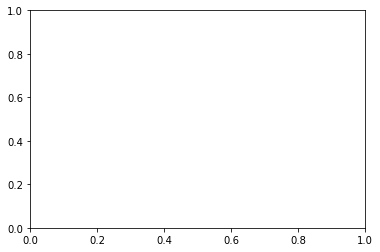

In [7]:
weights = numpy.ones_like(fidelity)/float(len(fidelity))
plt.hist(fidelity, bins=bins_list, weights=weights, label='Result', range=[0, 1])
plt.plot(bins_x, P_harr_hist[:-1], label='Harr random')
plt.legend(loc='upper right')
plt.show()

In [ ]:
P_I_hist = numpy.histogram(fidelity, bins = bins_list, weights = weights, range=[0, 1])[0]
kl_pq = kl_div(P_I_hist, P_harr_hist)
print('KL(P || Q): %.3f nats' % sum(kl_pq))

In [ ]:
with open('results//fidelity_execution_time_1_1_3_1_main.pickle', 'wb') as handle:
    pickle.dump(fidelity, handle, protocol=pickle.HIGHEST_PROTOCOL)